In [2]:
# Install Ultralytics if not already installed
!pip install -q ultralytics

In [3]:
# Import dependencies
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Load YOLOv8 model (small version for speed)
model = YOLO("yolov8s.pt")

In [20]:
# Upload an image
uploaded = files.upload()
image_path = next(iter(uploaded))  # Get first uploaded file name


Saving download (1).jpeg to download (1).jpeg



image 1/1 /content/download (1).jpeg: 256x640 14 cars, 3 buss, 1 traffic light, 261.6ms
Speed: 2.7ms preprocess, 261.6ms inference, 3.4ms postprocess per image at shape (1, 3, 256, 640)


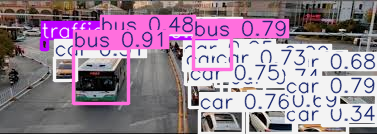

✅ Detection completed! Saved as detected_image.jpg
🔎 Detected Objects:
 - bus (0.91)
 - car (0.79)
 - bus (0.79)
 - car (0.76)
 - car (0.75)
 - car (0.74)
 - car (0.73)
 - car (0.69)
 - car (0.68)
 - car (0.65)
 - car (0.56)
 - car (0.51)
 - bus (0.48)
 - car (0.34)
 - car (0.31)
 - car (0.29)
 - traffic light (0.25)
 - car (0.25)


In [22]:
# Run YOLO detection
results = model(image_path)

# Process results
for r in results:
    annotated_img = r.plot()  # Draw bounding boxes

    # Show annotated image
    cv2_imshow(annotated_img)

    # Save annotated image
    output_path = "detected_image.jpg"
    cv2.imwrite(output_path, annotated_img)
    print(f"✅ Detection completed! Saved as {output_path}")

    # Optional: print detected objects
    print("🔎 Detected Objects:")
    for box in r.boxes:
        cls_id = int(box.cls[0])  # Class ID
        conf = float(box.conf[0]) # Confidence
        print(f" - {model.names[cls_id]} ({conf:.2f})")